**TASK 3: Handwritten Character Recognition**
**Objective:** Identify handwritten characters or alphabets.
**Approach:** Use image processing and deep learning.
**Key Features:**
● Dataset: MNIST (digits), EMNIST (characters).
● Model: Convolutional Neural Networks (CNN).
● Extendable to full word or sentence recognition with sequence modeling (like CRNN).

In [ ]:
# Environment Setup
!pip uninstall -y keras
!pip install tensorflow

Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # The MNIST Dataset is already available in Google Colab.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Dataset size
print("Training Images:", x_train.shape)
print("Training Labels:", y_train.shape)
print("Testing Images:", x_test.shape)
print("Testing Labels:", y_test.shape)

Training Images: (60000, 28, 28)
Training Labels: (60000,)
Testing Images: (10000, 28, 28)
Testing Labels: (10000,)


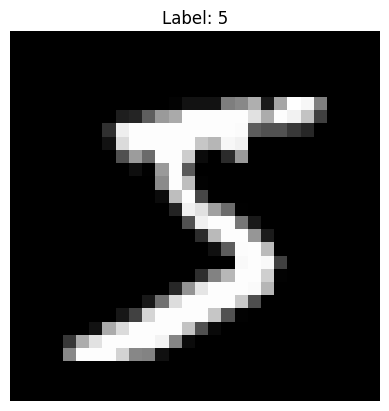

In [ ]:
# Visual the dataset
plt.imshow(x_train[0], cmap='gray')
plt.title("Label: " + str(y_train[0]))
plt.axis('off')
plt.show()

In [ ]:
# Data Preprocessing
# Normalize images (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN ke liye reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Machine Learning Model (CNN)
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Model Training
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.9456 - loss: 0.1807 - val_accuracy: 0.9800 - val_loss: 0.0674
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9888 - val_loss: 0.0433
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9897 - val_loss: 0.0396
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9907 - val_loss: 0.0353


In [ ]:
# Test the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Final Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9889 - loss: 0.0324
Final Test Accuracy: 0.9889000058174133


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


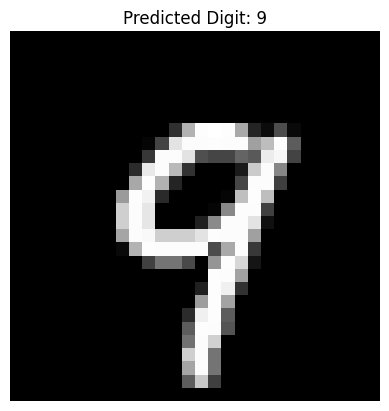

In [ ]:
# Prediction
index = 12  # number change karke test kar sakti ho

prediction = model.predict(x_test[index].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

In [ ]:
print("Actual Label:", np.argmax(y_test[index]))
print("Predicted Label:", predicted_digit)

Actual Label: 9
Predicted Label: 9


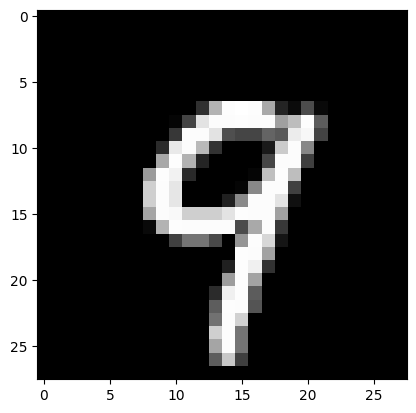

In [ ]:
plt.imshow(x_test[index].reshape(28,28), cmap='gray')

In [ ]:
# Check Multiple Images
for i in range(5):
    pred = model.predict(x_test[i].reshape(1,28,28,1))
    print("Index:", i,
          "Actual:", np.argmax(y_test[i]),
          "Predicted:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Index: 0 Actual: 7 Predicted: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Index: 1 Actual: 2 Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Index: 2 Actual: 1 Predicted: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Index: 3 Actual: 0 Predicted: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Index: 4 Actual: 4 Predicted: 4
